In [ ]:
import os
import random
import shutil
import tempfile
import torch
from pytorch_fid import fid_score
from PIL import Image
from torchvision import transforms
import numpy as np

def redimensionar_imagenes(ruta, tamano=(299, 299)):
    """Redimensiona todas las imágenes en una ruta dada a un tamaño específico."""
    transform = transforms.Resize(tamano)
    imagenes = [os.path.join(ruta, f) for f in os.listdir(ruta) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    for img_path in imagenes:
        try:
            img = Image.open(img_path).convert('RGB')  # Asegura que sean RGB
            img_redimensionada = transform(img)
            img_redimensionada.save(img_path)
        except Exception as e:
            print(f"Error al redimensionar {img_path}: {e}")

def calcular_fid_aleatorio(ruta1, ruta2, num_grupos=20, tamano_grupo=200):
    # Redimensionar imágenes en ambas rutas
    redimensionar_imagenes(ruta1)
    redimensionar_imagenes(ruta2)

    imagenes_ruta1 = [os.path.join(ruta1, f) for f in os.listdir(ruta1) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    imagenes_ruta2 = [os.path.join(ruta2, f) for f in os.listdir(ruta2) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

    if len(imagenes_ruta1) == 0:
        raise ValueError(f"No se encontraron imágenes en {ruta1}")
    if len(imagenes_ruta2) < tamano_grupo:
        raise ValueError(f"No hay suficientes imágenes en {ruta2} para formar un grupo de tamaño {tamano_grupo}")

    fids = []
    for i in range(num_grupos):
        with tempfile.TemporaryDirectory() as temp_dir:
            grupo_aleatorio = random.sample(imagenes_ruta2, tamano_grupo)
            for img in grupo_aleatorio:
                shutil.copy(img, temp_dir)

            fid_value = fid_score.calculate_fid_given_paths([ruta1, temp_dir],
                                                            batch_size=50,
                                                            device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
                                                            dims=2048,
                                                            num_workers=0)
            fids.append(fid_value)
            print(f"FID para el grupo {i+1}: {fid_value}")

    return fids

# generadas_huggingfaces inicial

In [2]:
if __name__ == "__main__":
    ruta1 = "original_inicial"
    ruta2 = "generadas_huggingfaces/inicial"

    fids_hf_ini = calcular_fid_aleatorio(ruta1, ruta2)

    fid_medio = np.mean(fids_hf_ini)
    fid_std = np.std(fids_hf_ini)

    print(f"FID medio: {fid_medio:.2f} ± {fid_std:.2f}")

100%|██████████| 4/4 [00:52<00:00, 13.05s/it]


FID para el grupo 1: 212.40597285916743


100%|██████████| 4/4 [00:40<00:00, 10.06s/it]


FID para el grupo 2: 203.64266760585605


100%|██████████| 4/4 [00:43<00:00, 10.99s/it]


FID para el grupo 3: 199.74327478563302


100%|██████████| 4/4 [00:37<00:00,  9.29s/it]


FID para el grupo 4: 210.83555179555623


100%|██████████| 4/4 [00:37<00:00,  9.36s/it]


FID para el grupo 5: 204.73546287893822


100%|██████████| 4/4 [00:33<00:00,  8.37s/it]


FID para el grupo 6: 207.00284996985985


100%|██████████| 4/4 [00:34<00:00,  8.64s/it]


FID para el grupo 7: 198.894066778624


100%|██████████| 4/4 [00:33<00:00,  8.47s/it]


FID para el grupo 8: 209.9262587670479


100%|██████████| 4/4 [00:35<00:00,  8.83s/it]


FID para el grupo 9: 209.37367538617775


100%|██████████| 4/4 [00:35<00:00,  8.87s/it]


FID para el grupo 10: 211.98832302161895


100%|██████████| 4/4 [00:34<00:00,  8.71s/it]


FID para el grupo 11: 211.2577541479938


100%|██████████| 4/4 [00:35<00:00,  8.87s/it]


FID para el grupo 12: 211.47031179144656


100%|██████████| 4/4 [00:38<00:00,  9.67s/it]


FID para el grupo 13: 200.47675912215988


100%|██████████| 4/4 [00:35<00:00,  8.90s/it]


FID para el grupo 14: 203.50156916710517


100%|██████████| 4/4 [00:34<00:00,  8.74s/it]


FID para el grupo 15: 206.85282076808193


100%|██████████| 4/4 [00:34<00:00,  8.66s/it]


FID para el grupo 16: 206.79641575164987


100%|██████████| 4/4 [00:35<00:00,  8.77s/it]


FID para el grupo 17: 208.59536902288147


100%|██████████| 4/4 [00:34<00:00,  8.70s/it]


FID para el grupo 18: 207.12182652549


100%|██████████| 4/4 [00:34<00:00,  8.66s/it]


FID para el grupo 19: 205.59452221738738


100%|██████████| 4/4 [00:35<00:00,  8.76s/it]


FID para el grupo 20: 205.14780222500224
FID medio: 206.77 ± 3.99


# generadas_huggingfaces avanzado

In [3]:
if __name__ == "__main__":
    ruta1 = "original_avanzado"
    ruta2 = "generadas_huggingfaces/avanzado"

    fids_hf_adv = calcular_fid_aleatorio(ruta1, ruta2)

    fid_medio = np.mean(fids_hf_adv)
    fid_std = np.std(fids_hf_adv)

    print(f"FID medio: {fid_medio:.2f} ± {fid_std:.2f}")

100%|██████████| 4/4 [00:35<00:00,  8.85s/it]


FID para el grupo 1: 194.65735609180206


100%|██████████| 4/4 [00:34<00:00,  8.72s/it]


FID para el grupo 2: 190.7941856228024


100%|██████████| 4/4 [00:34<00:00,  8.74s/it]


FID para el grupo 3: 197.50317113323692


100%|██████████| 4/4 [00:34<00:00,  8.65s/it]


FID para el grupo 4: 193.76085546280677


100%|██████████| 4/4 [00:34<00:00,  8.61s/it]


FID para el grupo 5: 194.86229539900637


100%|██████████| 4/4 [00:33<00:00,  8.45s/it]


FID para el grupo 6: 198.9244279749718


100%|██████████| 4/4 [00:34<00:00,  8.67s/it]


FID para el grupo 7: 193.80420614898944


100%|██████████| 4/4 [00:34<00:00,  8.65s/it]


FID para el grupo 8: 195.8889838867051


100%|██████████| 4/4 [00:35<00:00,  8.78s/it]


FID para el grupo 9: 193.00611570870774


100%|██████████| 4/4 [00:34<00:00,  8.66s/it]


FID para el grupo 10: 193.33432245998392


100%|██████████| 4/4 [00:34<00:00,  8.74s/it]


FID para el grupo 11: 193.75145313076266


100%|██████████| 4/4 [00:34<00:00,  8.56s/it]


FID para el grupo 12: 193.62761117312994


100%|██████████| 4/4 [00:34<00:00,  8.64s/it]


FID para el grupo 13: 193.18863304772643


100%|██████████| 4/4 [00:34<00:00,  8.60s/it]


FID para el grupo 14: 192.03603992035494


100%|██████████| 4/4 [00:34<00:00,  8.56s/it]


FID para el grupo 15: 192.8125585261801


100%|██████████| 4/4 [00:34<00:00,  8.61s/it]


FID para el grupo 16: 195.1540252849383


100%|██████████| 4/4 [00:34<00:00,  8.74s/it]


FID para el grupo 17: 192.7664316930698


100%|██████████| 4/4 [00:34<00:00,  8.64s/it]


FID para el grupo 18: 195.22571511752835


100%|██████████| 4/4 [00:34<00:00,  8.53s/it]


FID para el grupo 19: 198.52628345664084


100%|██████████| 4/4 [00:37<00:00,  9.30s/it]


FID para el grupo 20: 190.7961177546636
FID medio: 194.22 ± 2.16


# generadas_ddim inicial

In [4]:
if __name__ == "__main__":
    ruta1 = "original_inicial"
    ruta2 = "generadas_ddim/inicial"

    fids_ddim_ini = calcular_fid_aleatorio(ruta1, ruta2)
    
    fid_medio = np.mean(fids_ddim_ini)
    fid_std = np.std(fids_ddim_ini)

    print(f"FID medio: {fid_medio:.2f} ± {fid_std:.2f}")

100%|██████████| 4/4 [00:58<00:00, 14.58s/it]


FID para el grupo 1: 197.24777858112134


100%|██████████| 4/4 [00:58<00:00, 14.73s/it]


FID para el grupo 2: 195.69799567798603


100%|██████████| 4/4 [00:53<00:00, 13.27s/it]


FID para el grupo 3: 195.03299818224988


100%|██████████| 4/4 [00:57<00:00, 14.49s/it]


FID para el grupo 4: 198.88626825224404


100%|██████████| 4/4 [00:57<00:00, 14.49s/it]


FID para el grupo 5: 193.37362212480787


100%|██████████| 4/4 [00:54<00:00, 13.72s/it]


FID para el grupo 6: 191.8463915700764


100%|██████████| 4/4 [00:57<00:00, 14.34s/it]


FID para el grupo 7: 193.47618624583805


100%|██████████| 4/4 [00:57<00:00, 14.28s/it]


FID para el grupo 8: 194.95258839582823


100%|██████████| 4/4 [00:56<00:00, 14.25s/it]


FID para el grupo 9: 196.15213178131728


100%|██████████| 4/4 [00:57<00:00, 14.27s/it]


FID para el grupo 10: 196.20141922767533


100%|██████████| 4/4 [00:57<00:00, 14.35s/it]


FID para el grupo 11: 196.48656590010089


100%|██████████| 4/4 [00:56<00:00, 14.25s/it]


FID para el grupo 12: 201.56044258041362


100%|██████████| 4/4 [00:57<00:00, 14.42s/it]


FID para el grupo 13: 195.59762220939467


100%|██████████| 4/4 [00:57<00:00, 14.26s/it]


FID para el grupo 14: 194.37571646318105


100%|██████████| 4/4 [00:45<00:00, 11.47s/it]


FID para el grupo 15: 196.66851953932064


100%|██████████| 4/4 [00:36<00:00,  9.09s/it]


FID para el grupo 16: 198.37883601267663


100%|██████████| 4/4 [00:36<00:00,  9.02s/it]


FID para el grupo 17: 194.32095227247373


100%|██████████| 4/4 [00:35<00:00,  8.99s/it]


FID para el grupo 18: 196.34047374233714


100%|██████████| 4/4 [00:36<00:00,  9.06s/it]


FID para el grupo 19: 195.15177305816462


100%|██████████| 4/4 [00:35<00:00,  8.93s/it]


FID para el grupo 20: 198.99184451044258
FID medio: 196.04 ± 2.18


# generadas_ddim avanzado

In [5]:
if __name__ == "__main__":
    ruta1 = "original_avanzado"
    ruta2 = "generadas_ddim/avanzado"

    fids_ddim_adv = calcular_fid_aleatorio(ruta1, ruta2)

    fid_medio = np.mean(fids_ddim_adv)
    fid_std = np.std(fids_ddim_adv)

    print(f"FID medio: {fid_medio:.2f} ± {fid_std:.2f}")

100%|██████████| 4/4 [00:36<00:00,  9.11s/it]


FID para el grupo 1: 186.71528809378054


100%|██████████| 4/4 [00:36<00:00,  9.01s/it]


FID para el grupo 2: 186.2755236230381


100%|██████████| 4/4 [00:38<00:00,  9.57s/it]


FID para el grupo 3: 185.84120235523653


100%|██████████| 4/4 [00:32<00:00,  8.16s/it]


FID para el grupo 4: 181.1198267867893


100%|██████████| 4/4 [00:32<00:00,  8.15s/it]


FID para el grupo 5: 181.68800694365095


100%|██████████| 4/4 [00:32<00:00,  8.16s/it]


FID para el grupo 6: 181.7370828522143


100%|██████████| 4/4 [00:32<00:00,  8.14s/it]


FID para el grupo 7: 183.48784390659176


100%|██████████| 4/4 [00:35<00:00,  8.82s/it]


FID para el grupo 8: 181.8697346454985


100%|██████████| 4/4 [00:35<00:00,  8.96s/it]


FID para el grupo 9: 181.33773768832424


100%|██████████| 4/4 [00:42<00:00, 10.59s/it]


FID para el grupo 10: 180.82504516751104


100%|██████████| 4/4 [00:35<00:00,  8.97s/it]


FID para el grupo 11: 181.50218327182466


100%|██████████| 4/4 [00:41<00:00, 10.30s/it]


FID para el grupo 12: 182.62282977786327


100%|██████████| 4/4 [00:37<00:00,  9.29s/it]


FID para el grupo 13: 181.2880441681624


100%|██████████| 4/4 [00:35<00:00,  8.92s/it]


FID para el grupo 14: 179.00046381717283


100%|██████████| 4/4 [00:36<00:00,  9.25s/it]


FID para el grupo 15: 182.3677380087371


100%|██████████| 4/4 [00:55<00:00, 14.00s/it]


FID para el grupo 16: 180.56802511970977


100%|██████████| 4/4 [00:56<00:00, 14.13s/it]


FID para el grupo 17: 183.45977653368266


100%|██████████| 4/4 [00:55<00:00, 13.85s/it]


FID para el grupo 18: 182.79784714419804


100%|██████████| 4/4 [00:56<00:00, 14.18s/it]


FID para el grupo 19: 179.79336867614091


100%|██████████| 4/4 [00:56<00:00, 14.09s/it]


FID para el grupo 20: 179.82017646342638
FID medio: 182.21 ± 2.05


# generadas_ddim_seg_cuadrada inicial

In [7]:
if __name__ == "__main__":
    ruta1 = "original_inicial_seg_cuadrada"
    ruta2 = "generadas_ddim_seg_cuadrada/inicial"

    fids_hf_seg_ini = calcular_fid_aleatorio(ruta1, ruta2)

    fid_medio = np.mean(fids_hf_seg_ini)
    fid_std = np.std(fids_hf_seg_ini)

    print(f"FID medio: {fid_medio:.2f} ± {fid_std:.2f}")

100%|██████████| 4/4 [00:39<00:00,  9.96s/it]


FID para el grupo 1: 184.9124996432916


100%|██████████| 4/4 [00:42<00:00, 10.71s/it]


FID para el grupo 2: 195.85285012556608


100%|██████████| 4/4 [00:40<00:00, 10.08s/it]


FID para el grupo 3: 190.21840958286958


100%|██████████| 4/4 [00:36<00:00,  9.22s/it]


FID para el grupo 4: 183.14069589837138


100%|██████████| 4/4 [00:34<00:00,  8.56s/it]


FID para el grupo 5: 188.36779187754397


100%|██████████| 4/4 [00:35<00:00,  8.85s/it]


FID para el grupo 6: 189.52916051419442


100%|██████████| 4/4 [00:34<00:00,  8.68s/it]


FID para el grupo 7: 188.26566471803207


100%|██████████| 4/4 [00:35<00:00,  8.83s/it]


FID para el grupo 8: 185.23055523482972


100%|██████████| 4/4 [00:34<00:00,  8.69s/it]


FID para el grupo 9: 186.63116164803958


100%|██████████| 4/4 [00:36<00:00,  9.13s/it]


FID para el grupo 10: 187.0859717578623


100%|██████████| 4/4 [00:38<00:00,  9.52s/it]


FID para el grupo 11: 190.06081220426222


100%|██████████| 4/4 [00:35<00:00,  8.91s/it]


FID para el grupo 12: 192.01409415987519


100%|██████████| 4/4 [00:36<00:00,  9.21s/it]


FID para el grupo 13: 193.41243138990083


100%|██████████| 4/4 [00:38<00:00,  9.50s/it]


FID para el grupo 14: 188.96422855156518


100%|██████████| 4/4 [00:37<00:00,  9.49s/it]


FID para el grupo 15: 190.86522250361156


100%|██████████| 4/4 [00:37<00:00,  9.26s/it]


FID para el grupo 16: 198.51531992160568


100%|██████████| 4/4 [00:36<00:00,  9.03s/it]


FID para el grupo 17: 191.10445533559624


100%|██████████| 4/4 [00:36<00:00,  9.03s/it]


FID para el grupo 18: 186.97065834247093


100%|██████████| 4/4 [00:36<00:00,  9.12s/it]


FID para el grupo 19: 185.69183100054119


100%|██████████| 4/4 [00:36<00:00,  9.19s/it]


FID para el grupo 20: 192.09032580494517
FID medio: 189.45 ± 3.69


# generadas_ddim_seg_cuadrada avanzado

In [8]:
if __name__ == "__main__":
    ruta1 = "original_avanzado_seg_cuadrada"
    ruta2 = "generadas_ddim_seg_cuadrada/avanzado"

    fids_hf_seg_adv = calcular_fid_aleatorio(ruta1, ruta2)

    fid_medio = np.mean(fids_hf_seg_adv)
    fid_std = np.std(fids_hf_seg_adv)

    print(f"FID medio: {fid_medio:.2f} ± {fid_std:.2f}")

100%|██████████| 4/4 [00:34<00:00,  8.59s/it]


FID para el grupo 1: 234.5348246758469


100%|██████████| 4/4 [00:34<00:00,  8.60s/it]


FID para el grupo 2: 253.41607645629188


100%|██████████| 4/4 [00:35<00:00,  8.88s/it]


FID para el grupo 3: 245.35674945063266


100%|██████████| 4/4 [00:35<00:00,  8.89s/it]


FID para el grupo 4: 249.0365784152798


100%|██████████| 4/4 [00:35<00:00,  8.99s/it]


FID para el grupo 5: 249.0430538898302


100%|██████████| 4/4 [00:35<00:00,  8.80s/it]


FID para el grupo 6: 245.59875943832884


100%|██████████| 4/4 [00:34<00:00,  8.69s/it]


FID para el grupo 7: 236.08141898027532


100%|██████████| 4/4 [00:35<00:00,  8.80s/it]


FID para el grupo 8: 243.46398172709036


100%|██████████| 4/4 [00:34<00:00,  8.74s/it]


FID para el grupo 9: 237.4422622929631


100%|██████████| 4/4 [00:34<00:00,  8.71s/it]


FID para el grupo 10: 239.28497795126606


100%|██████████| 4/4 [00:35<00:00,  8.96s/it]


FID para el grupo 11: 246.9515830073844


100%|██████████| 4/4 [00:35<00:00,  8.81s/it]


FID para el grupo 12: 244.7440838534878


100%|██████████| 4/4 [00:34<00:00,  8.70s/it]


FID para el grupo 13: 243.40659791001244


100%|██████████| 4/4 [00:35<00:00,  8.79s/it]


FID para el grupo 14: 239.34156833913715


100%|██████████| 4/4 [00:34<00:00,  8.68s/it]


FID para el grupo 15: 241.59194290731588


100%|██████████| 4/4 [00:35<00:00,  8.75s/it]


FID para el grupo 16: 238.27457097983785


100%|██████████| 4/4 [00:34<00:00,  8.71s/it]


FID para el grupo 17: 248.4665695639609


100%|██████████| 4/4 [00:35<00:00,  8.82s/it]


FID para el grupo 18: 241.43756605747717


100%|██████████| 4/4 [00:36<00:00,  9.02s/it]


FID para el grupo 19: 236.3021889998608


100%|██████████| 4/4 [00:34<00:00,  8.70s/it]


FID para el grupo 20: 238.60563901141813
FID medio: 242.62 ± 5.04


# Boxlot

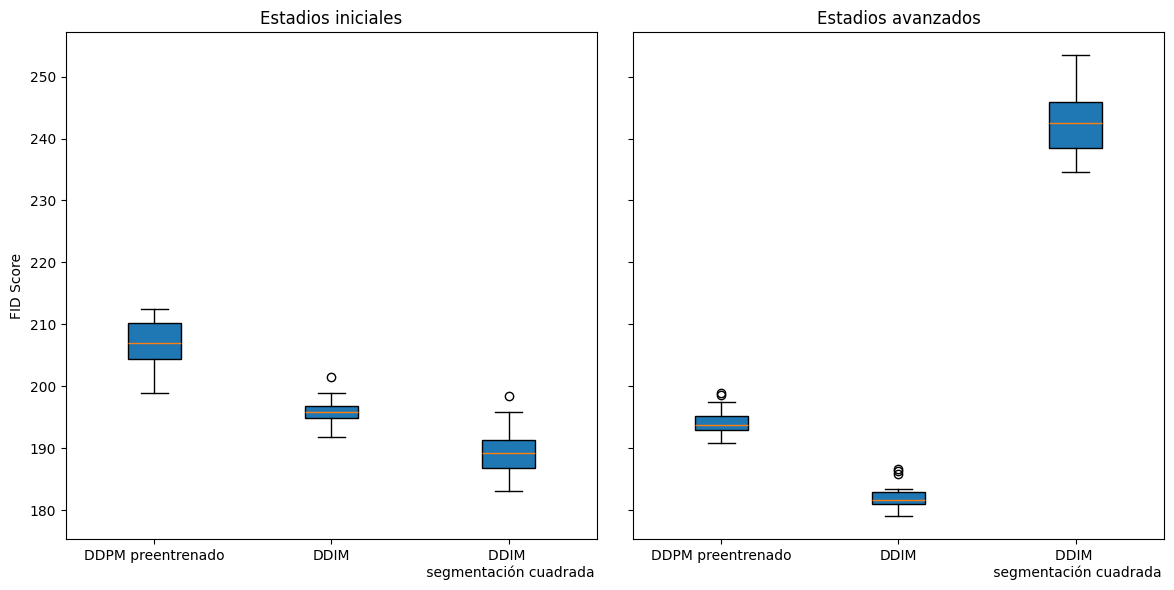

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Boxplot para estadios iniciales
axes[0].boxplot([fids_hf_ini, fids_ddim_ini, fids_hf_seg_ini], patch_artist=True)
axes[0].set_title("Estadios iniciales")
axes[0].set_xticklabels(["DDPM preentrenado", "DDIM", "DDIM \n segmentación cuadrada"])
axes[0].set_ylabel("FID Score")

# Boxplot para estadios avanzados
axes[1].boxplot([fids_hf_adv, fids_ddim_adv, fids_hf_seg_adv], patch_artist=True)
axes[1].set_title("Estadios avanzados")
axes[1].set_xticklabels(["DDPM preentrenado", "DDIM", "DDIM \n segmentación cuadrada"])

plt.tight_layout()
plt.show()